### Regresión Matriz de indicadores

REGRESION MULTIPLE

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

%matplotlib inline

#https://www.udemy.com/course/machinelearningpython/learn/lecture/9725454#overview  #Dummyes

C:\Users\eangenello\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\eangenello\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
matriz=pd.read_excel(r'C:\Users\eangenello\Desktop\Indicadores Matriz de Riesgo (1).xlsx')

In [3]:
matriz= matriz.fillna(0)

In [4]:
matriz.columns

Index(['Segmento', 'Cod Cia', 'DenominacionCorta', 'periodo', 'ind_01',
       'ind_02', 'ind_03', 'ind_04', 'ind_05', 'ind_06', 'ind_08', 'ind_09',
       'ind_10', 'ind_11', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16',
       'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23',
       'ind_24', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30',
       'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37',
       'ind_38', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43'],
      dtype='object')

In [5]:
matriz.head()

,Segmento,Cod Cia,DenominacionCorta,periodo,ind_01,ind_02,ind_03,ind_04,ind_05,ind_06,...,ind_34,ind_35,ind_36,ind_37,ind_38,ind_39,ind_40,ind_41,ind_42,ind_43
0,Automotores,2,SMG,2012-3,0.146803,0.139001,0.032215,0.361734,-0.014188,0.804980,...,0.149917,0.279136,0.193382,1.128130,0.654247,0.715473,0.000000,0.591843,0.421782,0.473884
1,Automotores,25,SURA,2012-3,0.169161,0.023642,0.049949,0.426382,-0.014267,0.868305,...,0.203650,0.204828,0.106757,0.992870,0.515578,0.509842,0.000000,10.852803,0.454467,0.477293
2,Automotores,32,BOSTON,2012-3,0.598821,0.120864,0.167596,0.560279,-0.021333,0.709601,...,0.202446,0.206838,0.300986,1.063682,0.576307,0.507125,0.000000,1.788726,0.366989,0.487375
3,Automotores,36,ALLIANZ,2012-3,0.456476,0.343485,0.074563,0.377228,-0.033411,0.660797,...,0.158920,0.224556,0.314846,1.055639,0.560171,0.469580,0.011075,0.647965,0.419682,0.495468
4,Automotores,39,ZURICH ASEGURADORA,2012-3,0.175903,0.079151,0.146605,0.323177,-0.021645,0.668201,...,0.133935,0.300690,0.123949,1.034134,0.524101,0.557524,0.000000,7.553690,0.461257,0.510034


In [6]:
# Quito indicadores que no se calculan para AUTOMOTORES (26, 33, 40)
# Quito Siniestralidad Neta y dejo Bruta ind_38

indicadores = matriz[['periodo','ind_01',
       'ind_02', 'ind_03', 'ind_04', 'ind_05', 'ind_06', 'ind_08', 'ind_09',
       'ind_10', 'ind_11', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16',
       'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23',
       'ind_24', 'ind_25', 'ind_27', 'ind_28', 'ind_29', 'ind_30',
       'ind_31', 'ind_32', 'ind_34', 'ind_35', 'ind_36', 'ind_37',
       'ind_38', 'ind_39', 'ind_41', 'ind_42', 'ind_43']].copy()
cias = matriz[['Cod Cia', 'DenominacionCorta']].copy()

In [7]:
#indicadores['año'] = pd.DatetimeIndex(indicadores['periodo']).year
#ind_new = indicadores.drop(indicadores[indicadores['año'] < 2018].index).copy()
#ind_new = ind_new.drop({'periodo', 'año'},1)

ind_new = indicadores.drop(indicadores[indicadores['periodo'] != '2019-1'].index).copy()
ind_new = ind_new.drop({'periodo'},1)

In [8]:
ind_new.head()

,ind_01,ind_02,ind_03,ind_04,ind_05,ind_06,ind_08,ind_09,ind_10,ind_11,...,ind_31,ind_32,ind_34,ind_35,ind_36,ind_37,ind_39,ind_41,ind_42,ind_43
1236,0.127998,0.068868,0.008017,0.250613,-0.041707,0.850515,0.000000,0.251997,0.000000,0.053436,...,-0.273583,2.094664,0.098712,0.264410,0.318644,1.339742,0.722917,7.592231,0.424091,0.516130
1237,0.120786,0.001630,0.009827,0.329481,-0.013960,0.890365,0.000000,0.516701,0.001633,0.299972,...,-0.324494,1.840537,0.197024,0.282912,0.137426,1.169053,0.582556,12.497957,0.544630,0.592098
1238,0.168989,0.040879,0.008567,0.270366,-0.056446,0.895406,0.349806,0.112400,0.000000,0.000000,...,-0.212182,2.085051,0.303832,0.209175,0.154141,1.221646,0.613158,9.748229,0.534830,0.597376
1239,0.229970,0.062346,0.009422,0.267534,-0.018883,0.852689,0.332760,0.447060,0.097786,0.071428,...,-0.212940,2.491094,0.150541,0.186966,0.344065,1.331397,0.841229,14.842976,0.383124,0.438548
1240,0.128802,0.019470,0.043907,0.224814,-0.023404,0.831285,0.384425,0.562162,0.001025,0.162020,...,-0.287437,1.575852,0.251481,0.171756,0.100725,0.993827,0.573082,10.504171,0.433718,0.475602


In [9]:
feature_cols = ind_new.loc[:,ind_new.columns !='ind_19'].columns

In [10]:
feature_cols

Index(['ind_01', 'ind_02', 'ind_03', 'ind_04', 'ind_05', 'ind_06', 'ind_08',
       'ind_09', 'ind_10', 'ind_11', 'ind_12', 'ind_13', 'ind_14', 'ind_15',
       'ind_16', 'ind_17', 'ind_18', 'ind_20', 'ind_21', 'ind_22', 'ind_23',
       'ind_24', 'ind_25', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31',
       'ind_32', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_41',
       'ind_42', 'ind_43'],
      dtype='object')

In [11]:
X = ind_new[feature_cols]
Y = ind_new['ind_19']

In [12]:
estimator = SVR(kernel='linear')
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X,Y)

In [13]:
ind_selec = pd.DataFrame(feature_cols)
ind_selec['selec'] = selector.support_
ind_selec = ind_selec[ind_selec['selec']==True]
ind_selec = ind_selec.rename(columns = {0:'indicador'})
ind_selec

,indicador,selec
26,ind_30,True
30,ind_35,True
36,ind_43,True


In [15]:
rank_selec = pd.DataFrame(feature_cols)
rank_selec['selec'] = selector.ranking_
rank_selec = rank_selec.sort_values(['selec'])
rank_selec=rank_selec.rename(columns = {0:'indicador'})
rank_selec

,indicador,selec
36,ind_43,1
30,ind_35,1
26,ind_30,1
35,ind_42,2
32,ind_37,3
33,ind_39,4
23,ind_27,5
24,ind_28,6
0,ind_01,7
5,ind_06,8


In [16]:
selector.ranking_

array([ 7, 12, 20, 31, 10,  8, 22, 14, 21, 11, 23, 33, 30, 34, 29, 16, 28,
       13, 27, 32, 18, 17, 19,  5,  6, 26,  1,  9, 25, 15,  1, 24,  3,  4,
       35,  2,  1])

In [17]:
X_pred = X[['ind_43', 'ind_30', 'ind_39', 'ind_27']]

In [18]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print('intecep', lm.intercept_)

intecep 0.9674629004905531


In [20]:
list(zip(feature_cols, lm.coef_))

[('ind_01', -0.03239446021243338),
 ('ind_02', -0.9605318485552633),
 ('ind_03', -0.032855960794116276),
 ('ind_04', -0.6480317009022181)]

In [21]:
lm.score(X_pred, Y)

0.9614749012541862

In [43]:
ind_new['prediction'] = lm.predict(pd.DataFrame(ind_new[X_pred.columns]))

In [45]:
ind_new[['ind_19', 'prediction']].head()

,ind_19,prediction
1236,-0.338360,-0.338360
1237,-0.168796,-0.168796
1238,-0.221152,-0.221152
1239,-0.337169,-0.337169
1240,0.005379,0.005379


In [97]:
SSD = np.sum((ind_new['prediction'] - ind_new['ind_04'])**2)
SSD

1.7282002156477225

In [98]:
#RSE = np.sqrt(SSD/len(ind_new)-len(X_pred.columns)-1)
RSE = np.sqrt(SSD/len(ind_new))
RSE 

0.079130240643074501

In [99]:
ind_04_mean = np.mean(ind_new['ind_04'])
ind_04_mean

0.2375845734316616

In [100]:
error = RSE / ind_04_mean
print(error*100, '%')

33.3061357899 %


TRANSFORMACIÓN DE VARIABLES PARA CONSEGUIR UNA RELACIÓN NO LINEAL

In [119]:
X = pd.DataFrame(ind_new['ind_16'].fillna(ind_new['ind_16'].mean()))
Y = pd.DataFrame(ind_new['ind_04'].fillna(ind_new['ind_04'].mean()))

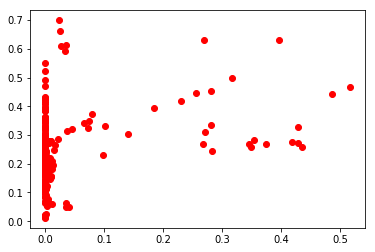

In [120]:
plt.plot(X, Y, 'ro')

In [121]:
lm =  LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

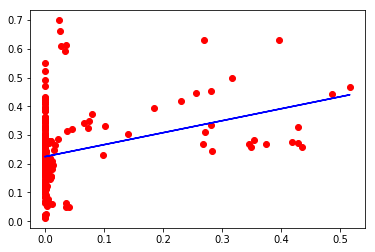

In [123]:
plt.plot(X,Y, 'ro')
plt.plot(X, lm.predict(X), color='blue')

In [125]:
# Contunuar